In [52]:
import pandas as pd
import plotly.express as px

In [53]:
# Import data
df = pd.read_csv('data/health_insurance_coverage_by_state_2016.csv')

In [54]:
# Verify data integrity
df.head()

,state,latitude,longitude,health_insurance_coverage,medicaid_enrollment,medicare_enrollment
0,Alabama,32.806671,-86.791130,165534,910775,989855
1,Alaska,61.370716,-152.404419,17995,166625,88966
2,Arizona,33.729759,-111.431221,179445,1716198,1175624
3,Arkansas,34.969704,-92.373123,63357,920194,606146
4,California,36.116203,-119.681564,1415428,11843081,5829777


In [55]:
df.tail()

,state,latitude,longitude,health_insurance_coverage,medicaid_enrollment,medicare_enrollment
46,Virginia,37.769337,-78.169968,378838,988821,1392261
47,Washington,47.400902,-121.490494,158245,1788536,1238649
48,West Virginia,38.491226,-80.954456,33235,575645,423500
49,Wisconsin,44.268543,-89.616508,224208,1046897,1084854
50,Wyoming,42.755966,-107.302490,22076,63583,99128


In [96]:
# Create a scatter plot with hover customization
fig = px.scatter_mapbox(df,
                        lat = df['latitude'],
                        lon = df['longitude'],
                        zoom = 3.5,
                        size = df['health_insurance_coverage'],
                        color=df['health_insurance_coverage'], 
                        color_continuous_scale=px.colors.sequential.Viridis,
                        width = 1200,
                        height = 800,
                        title = 'US Health Insurance Coverage by State (2016)'
                       )

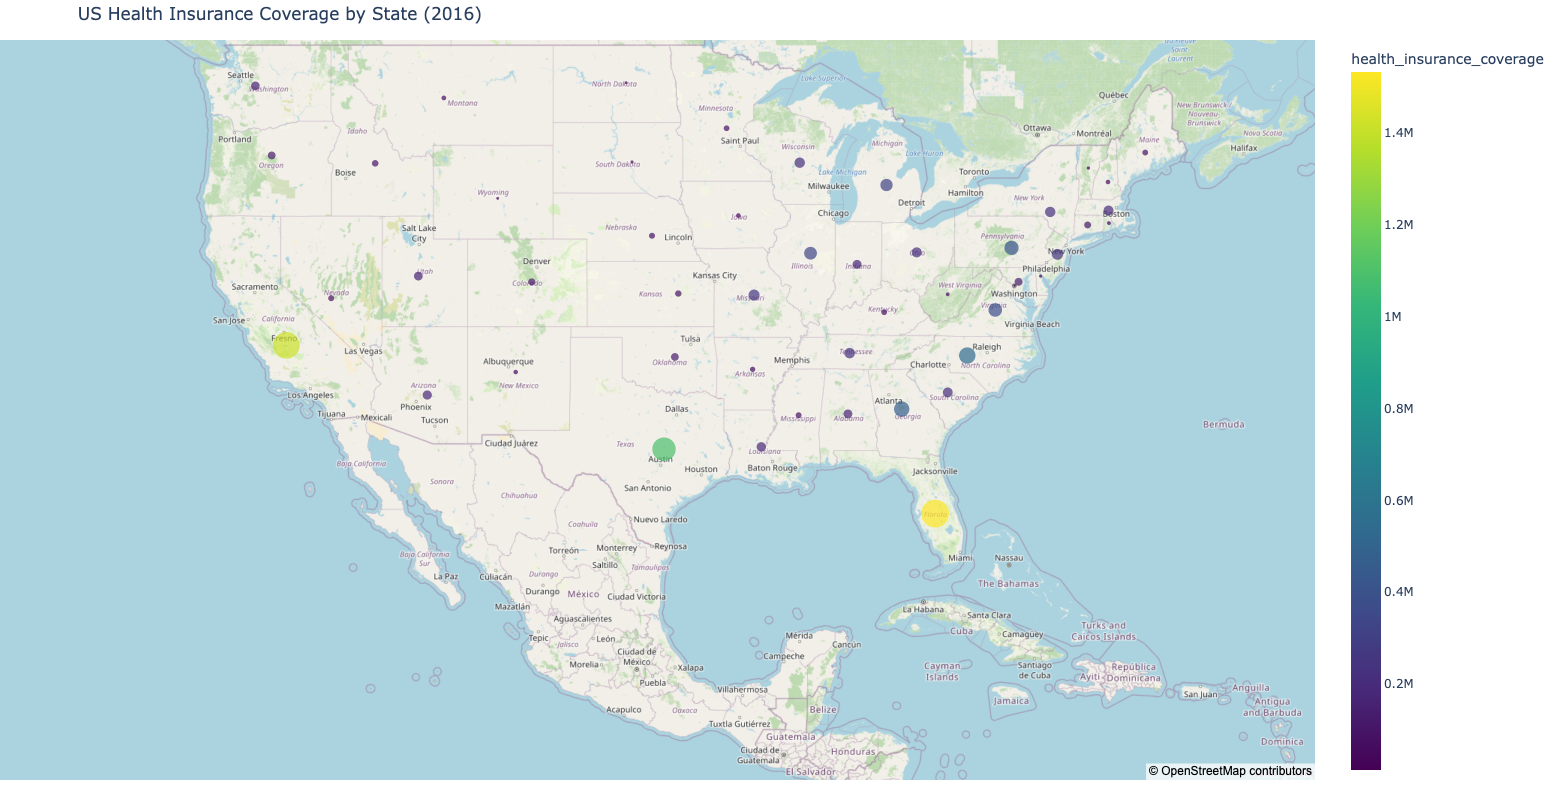

In [97]:
# Customize hovertemplate to show specific data (health insurance, Medicaid, Medicare)
fig.update_traces(
    hovertemplate="<b>State:</b> %{customdata[0]}<br>" +
                  "<b>Health Insurance Coverage:</b> %{customdata[1]:,}<br>" +
                  "<b>Medicaid Enrollment:</b> %{customdata[2]:,}<br>" +
                  "<b>Medicare Enrollment:</b> %{customdata[3]:,}<extra></extra>",
    customdata=df[['state', 'health_insurance_coverage', 'medicaid_enrollment', 'medicare_enrollment']].values
)

# Customize map layout and tooltip styling
fig.update_layout(mapbox_style='open-street-map',
                  hoverlabel=dict(
                      bgcolor="white", 
                      font_size=14,
                      font_family="Arial"
    ))
fig.update_layout(margin={'r':0, 't':40,'l':0, 'b':20})

# Show the plot
fig.show()